In [136]:
from dataclasses import dataclass,field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [137]:
df_prueba = pd.DataFrame({
"Es_pepito":['s','n',None,'s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"Es_pepito2":['s','n',None,'s','n','s','n','s',None,'s','s','n','s','s',None,'s','s','n','n','n',None,'s','s','s'],
"sexo":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"sexo2":['h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h','h','m','h'],
"Datos_B":[np.random.randint(0,5) for _ in range(24)],
"Datos_C":[np.random.randint(0,1) for _ in range(24)],
"Datos_D": [np.random.randint(0,1000) for _ in range(24)],
"Datos_E": [np.random.randint(0,1000) for _ in range(24)],
"Datos_F": [np.random.randint(0,1000) for _ in range(24)],
"Datos_G": [np.random.randint(0,1000) for _ in range(24)],
"Datos_cate_A": ['Grupo '+str(np.random.randint(0,6)) for _ in range(24)],
"Datos_cate_B": ['Grupo '+str(np.random.randint(0,4)) for _ in range(24)],
"Datos_cate_C": ['Grupo '+str(np.random.randint(0,5)) for _ in range(24)],

})

In [138]:

class DF_exploracion(pd.DataFrame):

    def __init__(self, *args, **kw):
        super(DF_exploracion, self).__init__(*args, **kw)
        self.cuanti=pd.DataFrame
        self.cuali=pd.DataFrame
        self.dico=pd.DataFrame
        self.cate=pd.DataFrame
        self.dummy=pd.DataFrame
        self.df=pd.DataFrame


    def variables(self):

        dico=[]
        cuantis=[]
        categori=[]
        eliminar=[]

        # print("|----------------------------------------------------------------------------------------------------")
        for i in self.columns: 
            if len(self[i].dropna().unique())==2:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: DICOTOMICA"
                dico.append(i)

            elif len(self[i].dropna().unique())>10:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CUANTITATIVA"
                cuantis.append(i)

            elif  len(self[i].dropna().unique())<2:
                tipo_de_var=f"SOLO {len(self[i].dropna().unique())} TIPOS, NO VALE LA COLUMNA"
                eliminar.append(i)
            else:
                tipo_de_var=f"{len(self[i].dropna().unique())} tipos, posiblemente: CATEGORICA/CUANTI"
                categori.append(i)

            print (f"|  {i} \n|   - Tipo de dato: {self[i].dtype} \n|   - Valores repetidos: {tipo_de_var} \n|   - Nulos: {self[i].isnull().sum()/len(self[i])} \n| ")

        print (f"|----------------------------------------------------------------------------------------------------\n|  TODAS: {self.columns} \n|  DICOTOMICAS: {dico} \n|  CATEGORICAS: {categori} \n|  CUANTITATIVAS: {cuantis} \n|  ELIMINAR: {eliminar}")
        print("|----------------------------------------------------------------------------------------------------")

        self.DF_cuantis(cuantis)
        self.DF_cualis(categori+dico)
        self.DF_dicotomica(dico)
        self.DF_categorica(categori)
        
       
    def todas_col(self):
        return self
    
    def DF_cuantis(self,lista):
        self.cuanti=self[lista]
        
    def DF_cualis(self,lista):
        self.cuali=self[lista]
        
    def DF_dicotomica(self, lista):
        self.dico=self[lista]
        
    def DF_categorica(self, lista):
        self.cate=self[lista]   
    
    def limpiar_dummys(self,var):
        aux=[]
        df_nuevo=pd.get_dummies(self, columns=var)

        for columna in df_nuevo.columns:
            for variables in var:
                if variables in columna:
                    aux.append(columna)
                
        self.dummy=df_nuevo[aux]
         
        self[aux]=df_nuevo[aux]
        # self.df=self.drop(columns=var, axis='columns')
        self.df= self[self.columns.difference(var)]
    
    def estadistica_descriptiva_cuantis(self):

        print("----------------------------------------------------------------------------------------------------\nDESCRIPCIÓN")
        print (self.cuanti.describe())
        print("\n")
        print("----------------------------------------------------------------------------------------------------\nCUARTILES")
        print (self.cuanti.quantile([0.05,0.25,0.5,0.75,0.95]))
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")


        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        # df_auxiliar = self.groupby('sexo').apply(lambda x: pd.Series(shapiro(x), index=['W','P'])).reset_index()
        # print(df_auxiliar)
                
        for a in list(aux1.values):
            
            for b in list(aux.values):
                
                print("++++++++++++++++++++++++++++  "+a+" y "+b+"  ++++++++++++++++++++++++++\n")
                agrupado=self.groupby(a)[b]
                titulo=f"Agrupado por {a} y por {b}"
                print(titulo)
                print(agrupado.describe().reset_index())
                # df.groupby(['cat1', 'cat2'])['purchases','sales'].apply(stats.shapiro)
                print("////////////////////////// TEST DE SHAPIRO ////////////////////////////")
                print(agrupado.apply(shapiro))
                
                print("\n")
                print("----------------------------------------------------------------------------------------------------\n")

        
     

    def estadistica_descriptiva_cualis(self):



        print("\n--------------------- Variables dico ---------------------")
        print("\n")
        for i in self.dico.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")

        print("\n-------------------- Variables categoricas --------------------")
        print("\n")
        for i in self.cate.columns:
            print(f"...........Frecuencia variable {i} ....................")
            print(self[i].value_counts()/(self[i].count()))
            print("\n")
        print("\n\n")

        # crosstab variables cualis con cate
        aux=list(self.cate.columns)

        a=0
        for i in aux:
            a=a+1
            if a<len(aux)/2:
                b=0
                for j in aux[:-1]:
                    b=b+1
                    if b > a:
                        print(f"*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} *********************\n ")
                        tab = pd.crosstab (index=self[i], columns=self[j])
                        x=(tab/tab.sum())
                        print(tab)
                        print("\n")
                        print(f"/////////////////// EN PROPORCION //////////////////\n")
                        print(x)
                        print("\n\n")


    def anova(self):

        aux_cate=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)

        for i in aux_cate:
            for j in aux_cuati:
                print(f"\n----------- ANOVA Categoria {i} y variable continua {j} ----------\n")
                model = ols(f"{j} ~ {i}", data=self).fit()
                a=sm.stats.anova_lm(model, typ=2)
                print(a)

# ARREGLAR ESTO ----------------------------------------------------------------------------------------------------------------------

    def Chi(self):

        aux_dico=list(self.dico.columns)

        a=0
        for i in aux_dico:
            a=a+1
            if a<len(aux_dico)/2:
                b=0
                for j in aux_dico[:-1]:
                    b=b+1
                    if b > a:
                        chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(self[i],self[j]), correction=False)
                        print(f"\n-------------- Chi2 entre {i} y {j} ----------------")
                        print(f"p: {p} \n")               

# ARREGLAR ESTO ----------------------------------------------------------------------------------------------------------------------

    def plot_normailidad(self):

        aux=self.cuanti.columns

        for i in aux:

            stats.probplot(self[i], dist="norm", plot=plt)
            plt.title("Probability Plot - " )
            plt.show()


    def plots(self):

        aux1=self.dico.columns
        aux2=self.cate.columns
        aux=self.cuanti.columns

        print("-------------- Graficas de bigotes cualitativas-------------------")
        fig = plt.figure(figsize=(10, 10))
        
        (self.cuanti).plot(kind='box', title='Variables cuantitativas')
        plt.show()
        
              
        print("-------------- Graficas de bigotes por dicotomicas-------------------")   

        for a in aux1:

            fig = plt.figure(figsize=(10, 10))
            self.boxplot(column=list(aux.values), by=a)
            plt.tight_layout() 
            plt.show()
        
        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- Graficas de bigotes por categoricas-------------------") 

        for a in aux2:
            fig = plt.figure(figsize=(10, 10))
            ax= self.boxplot(column=list(aux.values),figsize=(10,10), by=a)
            # ax = sns.swarmplot(column=list(aux.values), by=a,data=self, color='#7d0013')
            plt.tight_layout() 
            plt.show()
        

        print("\n")
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("----------------------------------------------------------------------------------------------------\n")
        
        print("-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------\n") 

        fig = plt.figure(figsize=(10, 10))

        matrix = self.cuanti.corr().round(2)
        sns.heatmap(matrix, annot=True)

        plt.show()

        print("----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------\n") 
        fig = plt.figure(figsize=(15, 20))
        self.cuanti.plot.bar()
        plt.show()

        print("-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------\n") 
        for i in list(aux.values):
            fig = plt.figure(figsize=(10, 10))
            print(f"\n.............. GRAFICA DE BARRAS  DE {i} ............\n") 
            ax=self[i].plot.hist(density=True)
            self[i].plot.density(ax=ax)
            plt.show()

        
        a=0
        for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            ax=self.plot.scatter(x=i,y=j,figsize=(4,4))
                            ax.set_xlabel(i)
                            ax.set_ylabel(j)
                            ax.axhline(np.mean(self[i]),color='grey',lw=1)
                            ax.axvline(np.mean(self[j]),color='grey',lw=1)
                            plt.show()
        print("\n----------------------------------------------------------------------------------------------------\n")

        print("-------------- GRAFICA DE VIONINES  -------------------\n") 
        sns.set(style="whitegrid")
        for i in aux2:
            for j in aux:
                ax= sns.violinplot(x=self[i], y=self[j], palette="Set2", split=True, inner="quartile",scale="count")
                plt.show()

        print("\n/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////\n") 
        
        for i in aux2:
            for j in aux:
                for k in aux1:
                    ax= sns.violinplot(x=self[i], y=self[j], hue=self[k],palette="Set2", split=True, inner="quartile",scale="count")
                    plt.show()


    def cross_var_cualis_con_ciantis(self):

        aux=list(self.cate.columns)
        aux_cuati=list(self.cuanti.columns)
       
        for k in aux_cuati:
            a=0
            for i in aux:
                a=a+1
                if a<len(aux)/2:
                    b=0
                    for j in aux[:-1]:
                        b=b+1
                        if b > a:
                            print(f"\n\n*************** TABAL DE VARIABLES CATEGORICAS {i} y {j} con valores de {k} MEDIA *********************\n ")
                            tab = pd.crosstab (index=self[i], columns=self[j],values=self[k],aggfunc=np.mean)
                            print(tab)
                            print("\n\n")




    

In [139]:
ejemplo=DF_exploracion(df_prueba)
ejemplo.variables()


|  Es_pepito 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.16666666666666666 
| 
|  Es_pepito2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.16666666666666666 
| 
|  sexo 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  sexo2 
|   - Tipo de dato: object 
|   - Valores repetidos: 2 tipos, posiblemente: DICOTOMICA 
|   - Nulos: 0.0 
| 
|  Datos_B 
|   - Tipo de dato: int64 
|   - Valores repetidos: 5 tipos, posiblemente: CATEGORICA/CUANTI 
|   - Nulos: 0.0 
| 
|  Datos_C 
|   - Tipo de dato: int64 
|   - Valores repetidos: SOLO 1 TIPOS, NO VALE LA COLUMNA 
|   - Nulos: 0.0 
| 
|  Datos_D 
|   - Tipo de dato: int64 
|   - Valores repetidos: 23 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 0.0 
| 
|  Datos_E 
|   - Tipo de dato: int64 
|   - Valores repetidos: 24 tipos, posiblemente: CUANTITATIVA 
|   - Nulos: 

In [140]:
ejemplo.limpiar_dummys( ['Es_pepito', 'Datos_C','sexo'])

In [141]:
# ejemplo.df
# ejemplo.cuanti
# ejemplo.dummy
# ejemplo.dico
ejemplo.todas_col()


,Es_pepito,Es_pepito2,sexo,sexo2,Datos_B,Datos_C,Datos_D,Datos_E,Datos_F,Datos_G,Datos_cate_A,Datos_cate_B,Datos_cate_C,Es_pepito_n,Es_pepito_s,Datos_C_0,sexo_h,sexo_m
0,s,s,h,h,2,0,939,505,658,893,Grupo 3,Grupo 3,Grupo 1,0,1,1,1,0
1,n,n,m,m,3,0,876,919,783,880,Grupo 0,Grupo 0,Grupo 3,1,0,1,0,1
2,None,None,h,h,2,0,133,499,684,41,Grupo 3,Grupo 1,Grupo 2,0,0,1,1,0
3,s,s,h,h,0,0,590,710,134,235,Grupo 0,Grupo 3,Grupo 2,0,1,1,1,0
4,n,n,m,m,0,0,226,129,21,178,Grupo 4,Grupo 2,Grupo 0,1,0,1,0,1
5,s,s,h,h,3,0,510,107,992,954,Grupo 4,Grupo 3,Grupo 0,0,1,1,1,0
6,n,n,h,h,4,0,972,488,696,134,Grupo 2,Grupo 3,Grupo 4,1,0,1,1,0
7,s,s,m,m,3,0,394,395,635,618,Grupo 2,Grupo 0,Grupo 1,0,1,1,0,1
8,None,None,h,h,2,0,365,801,180,508,Grupo 5,Grupo 0,Grupo 1,0,0,1,1,0
9,s,s,h,h,1,0,930,440,462,405,Grupo 5,Grupo 0,Grupo 3,0,1,1,1,0


In [142]:
ejemplo.estadistica_descriptiva_cuantis()

----------------------------------------------------------------------------------------------------
DESCRIPCIÓN
          Datos_D     Datos_E     Datos_F     Datos_G
count   24.000000   24.000000   24.000000   24.000000
mean   492.916667  438.833333  443.958333  459.416667
std    291.175715  253.539409  297.406248  283.617304
min     19.000000    0.000000   20.000000   41.000000
25%    289.750000  254.750000  206.250000  231.250000
50%    488.000000  464.000000  372.000000  399.500000
75%    635.250000  583.500000  664.500000  644.250000
max    972.000000  919.000000  992.000000  955.000000


----------------------------------------------------------------------------------------------------
CUARTILES
      Datos_D  Datos_E  Datos_F  Datos_G
0.05    75.20    16.90    33.75    99.70
0.25   289.75   254.75   206.25   231.25
0.50   488.00   464.00   372.00   399.50
0.75   635.25   583.50   664.50   644.25
0.95   953.45   825.65   956.70   944.85


----------------------------------------

In [143]:
ejemplo.dico

,Es_pepito,Es_pepito2,sexo,sexo2
0,s,s,h,h
1,n,n,m,m
2,None,None,h,h
3,s,s,h,h
4,n,n,m,m
5,s,s,h,h
6,n,n,h,h
7,s,s,m,m
8,None,None,h,h
9,s,s,h,h


In [144]:

ejemplo.estadistica_descriptiva_cualis()


--------------------- Variables dico ---------------------


...........Frecuencia variable Es_pepito ....................
s    0.65
n    0.35
Name: Es_pepito, dtype: float64


...........Frecuencia variable Es_pepito2 ....................
s    0.65
n    0.35
Name: Es_pepito2, dtype: float64


...........Frecuencia variable sexo ....................
h    0.666667
m    0.333333
Name: sexo, dtype: float64


...........Frecuencia variable sexo2 ....................
h    0.666667
m    0.333333
Name: sexo2, dtype: float64



-------------------- Variables categoricas --------------------


...........Frecuencia variable Datos_B ....................
3    0.250000
4    0.250000
0    0.208333
2    0.166667
1    0.125000
Name: Datos_B, dtype: float64


...........Frecuencia variable Datos_cate_A ....................
Grupo 3    0.250000
Grupo 0    0.208333
Grupo 4    0.166667
Grupo 1    0.166667
Grupo 2    0.125000
Grupo 5    0.083333
Name: Datos_cate_A, dtype: float64


...........Frecuencia v

In [145]:
ejemplo.cross_var_cualis_con_ciantis()



*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_A con valores de Datos_D MEDIA *********************
 
Datos_cate_A  Grupo 0  Grupo 1  Grupo 2     Grupo 3  Grupo 4  Grupo 5
Datos_B                                                              
0               393.0    510.0      NaN         NaN    372.5      NaN
1                 NaN      NaN      NaN   65.000000    171.0    930.0
2                 NaN    765.0      NaN  536.000000      NaN    365.0
3               645.5    714.5    394.0         NaN    510.0      NaN
4                19.0      NaN    641.5  498.333333      NaN      NaN





*************** TABAL DE VARIABLES CATEGORICAS Datos_B y Datos_cate_B con valores de Datos_D MEDIA *********************
 
Datos_cate_B     Grupo 0  Grupo 1  Grupo 2  Grupo 3
Datos_B                                            
0                    NaN    353.0    226.0    554.5
1             388.666667      NaN      NaN      NaN
2             365.000000    449.0      NaN    939

# TEST DE MEDIAS Y CHI2

In [146]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
# ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
# plt.show()


In [147]:
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# print(fvalue, pvalue)
# # 17.492810457516338 2.639241146210922e-05

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Ordinary Least Squares (OLS) model
# model = ols('value ~ C(treatments)', data=df_melt).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table
# # output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# # ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
# from bioinfokit.analys import stat
# res = stat()
# res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary
# # output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# # note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# # (typ parameter) will produce similar results.

In [148]:
chi, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_prueba['sexo'],df_prueba['Es_pepito']), correction=False)

print(p)


0.8482202494907526


In [149]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_prueba, res_var='Datos_D', anova_model="Datos_D ~ Datos_cate_B")
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
Datos_cate_B,3.0,2.889628e+05,96320.937037,1.159758,0.349707
Residual,20.0,1.661053e+06,83052.651111,NaN,NaN


In [150]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
#  
# for x in categorical_col:
#     model = ols('cnt' + '~' + x, data = BIKE).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

-------------- Graficas de bigotes cualitativas-------------------


<Figure size 720x720 with 0 Axes>

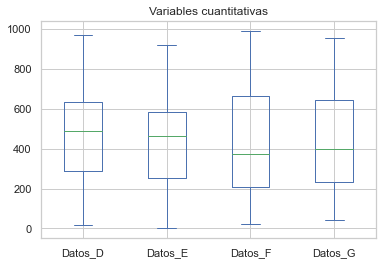

-------------- Graficas de bigotes por dicotomicas-------------------


<Figure size 720x720 with 0 Axes>

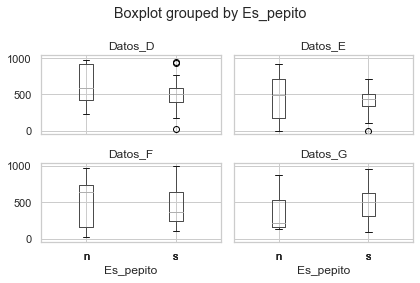

<Figure size 720x720 with 0 Axes>

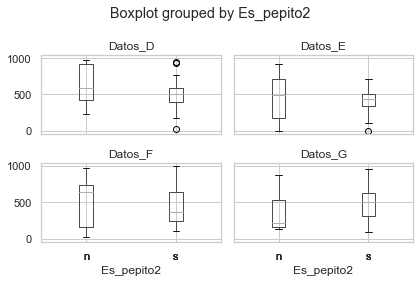

<Figure size 720x720 with 0 Axes>

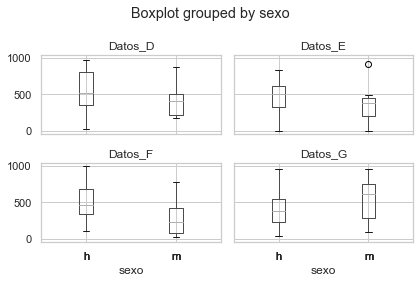

<Figure size 720x720 with 0 Axes>

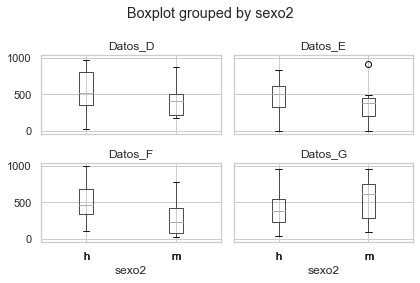



----------------------------------------------------------------------------------------------------

-------------- Graficas de bigotes por categoricas-------------------


<Figure size 720x720 with 0 Axes>

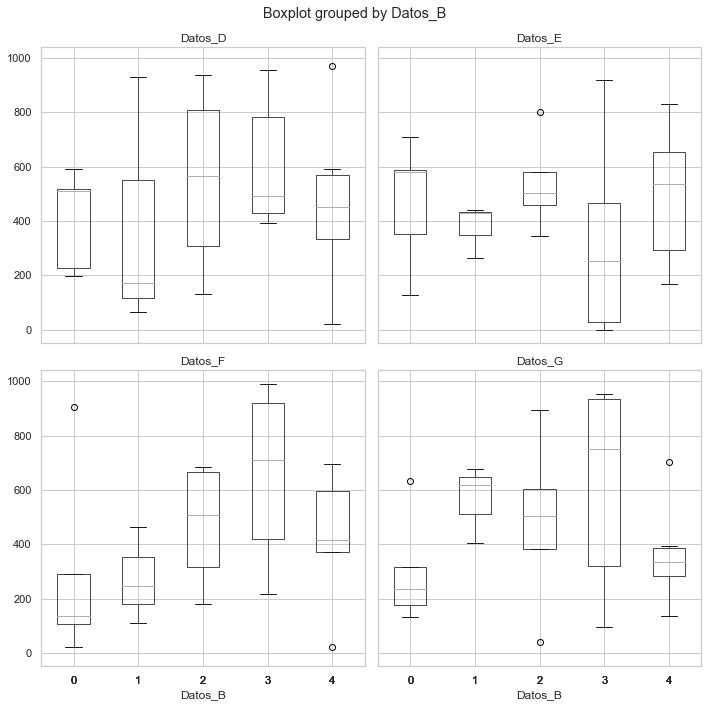

<Figure size 720x720 with 0 Axes>

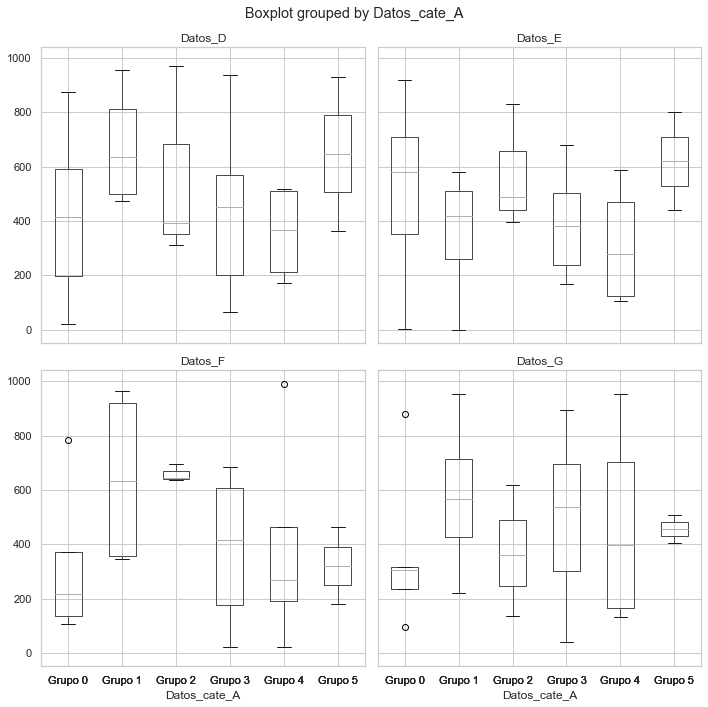

<Figure size 720x720 with 0 Axes>

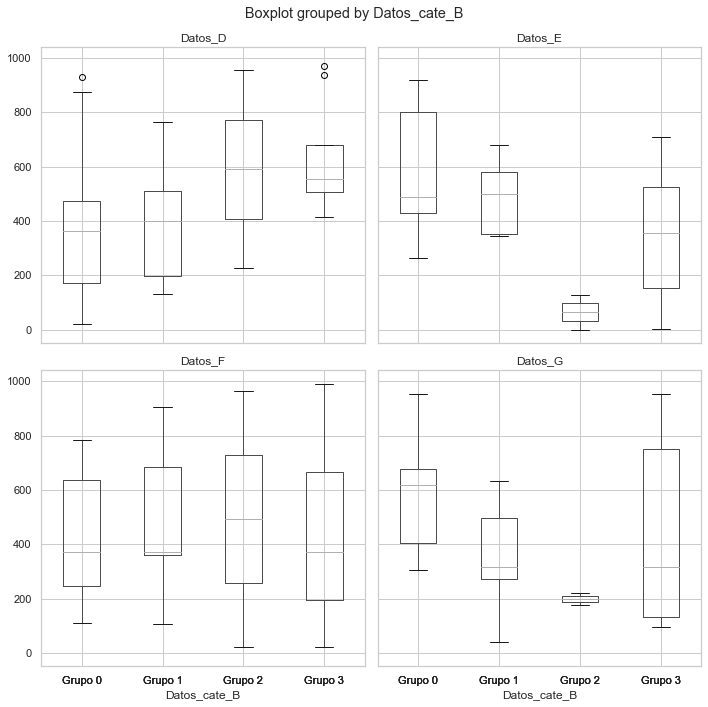

<Figure size 720x720 with 0 Axes>

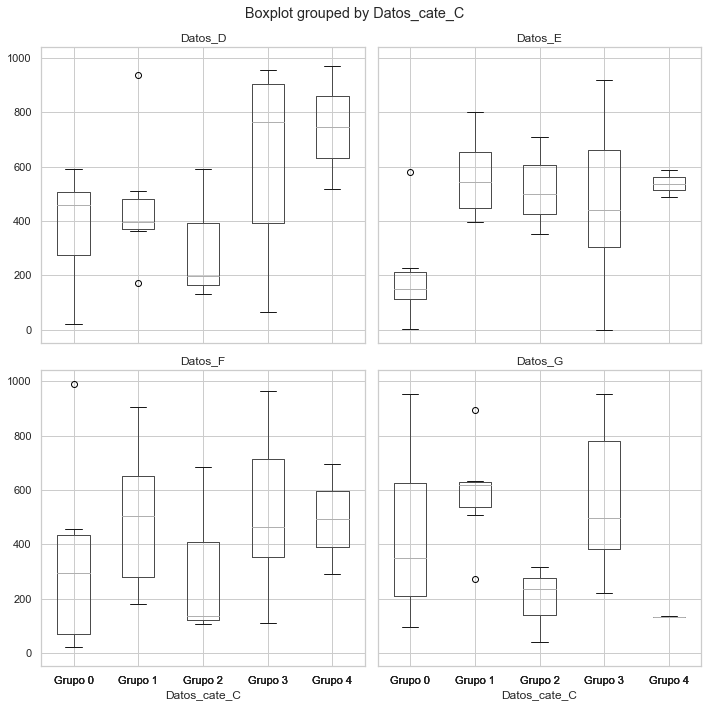



----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

-------------- MATRIZ DE CORRELACIONES ENTRE CUANTITATIVAS -------------------



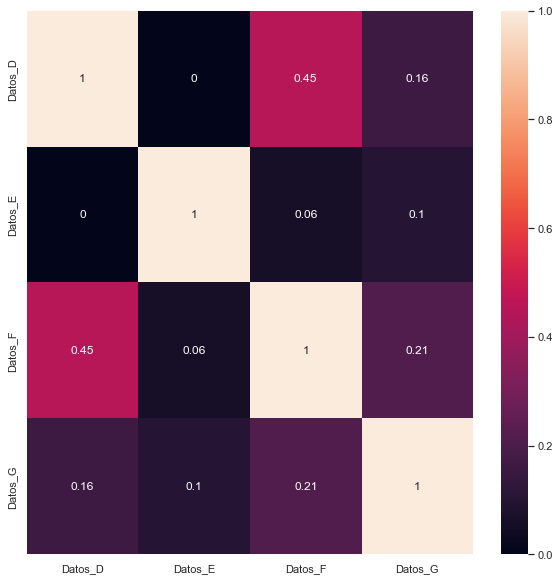

----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE BARRAS DE TODAS LAS CUANTITATIVAS -------------------



<Figure size 1080x1440 with 0 Axes>

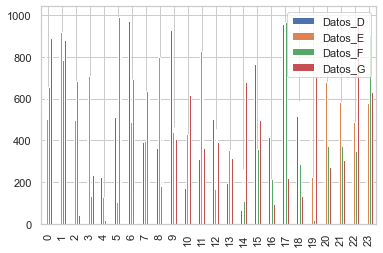

-------------- GRAFICA DE BARRAS CON DISTRIBUCIÓN DE DENSIDAD DE CADA CUANTITATIVA  -------------------


.............. GRAFICA DE BARRAS  DE Datos_D ............



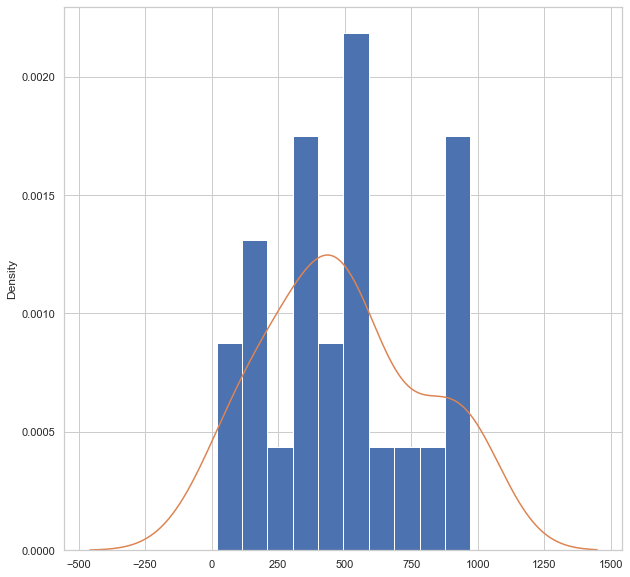


.............. GRAFICA DE BARRAS  DE Datos_E ............



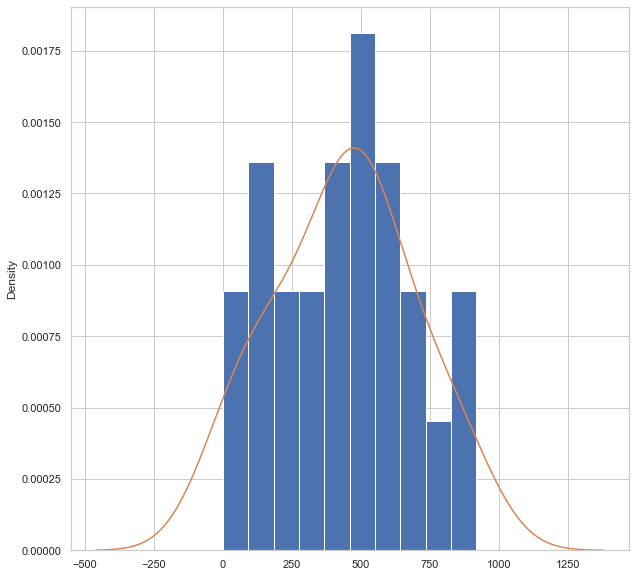


.............. GRAFICA DE BARRAS  DE Datos_F ............



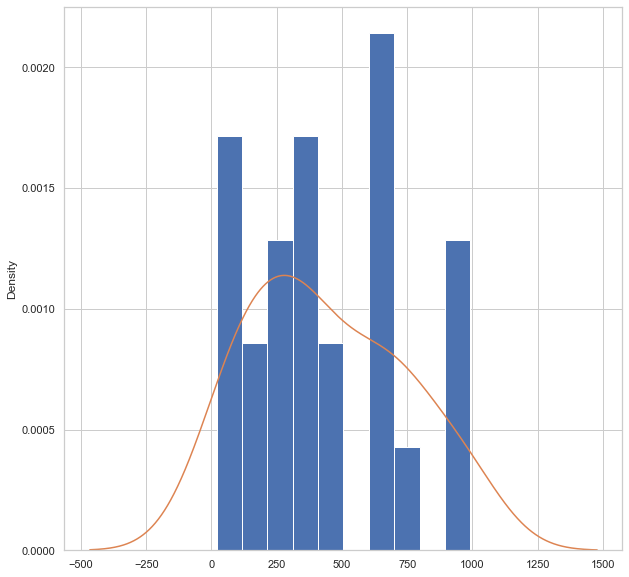


.............. GRAFICA DE BARRAS  DE Datos_G ............



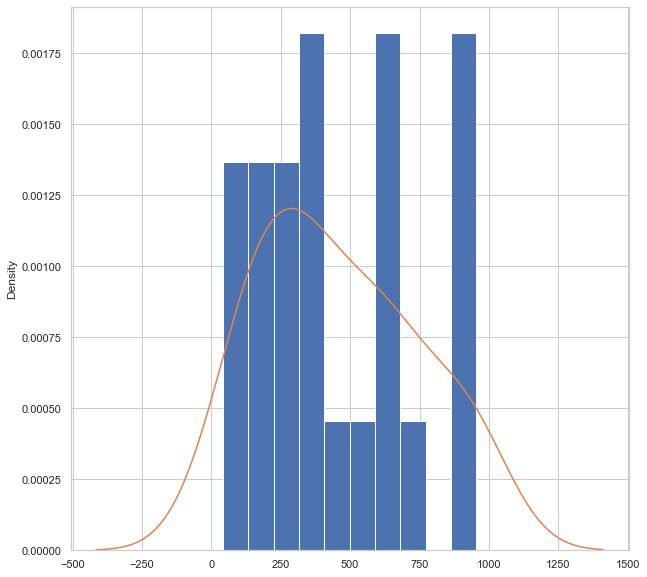

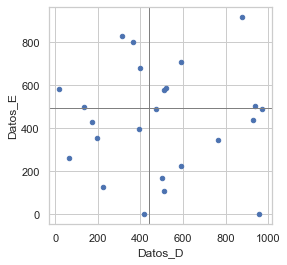

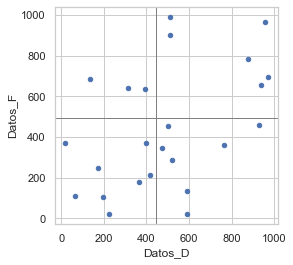


----------------------------------------------------------------------------------------------------

-------------- GRAFICA DE VIONINES  -------------------



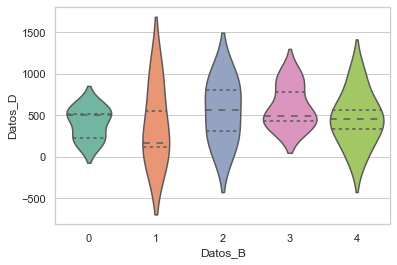

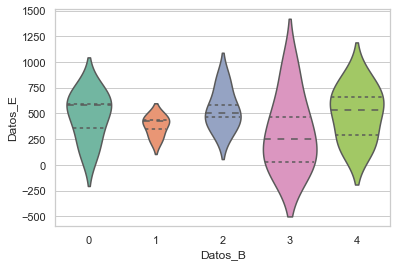

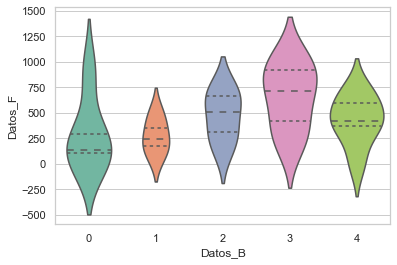

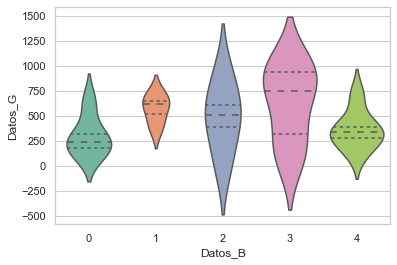

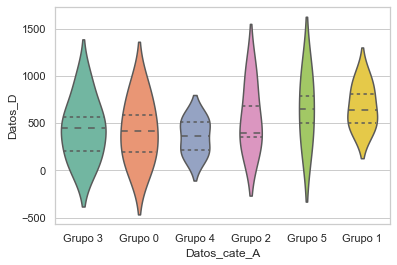

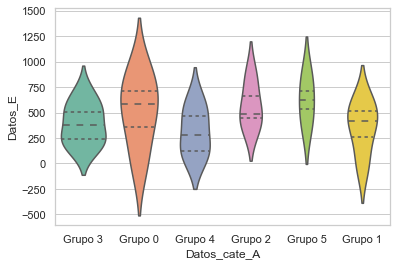

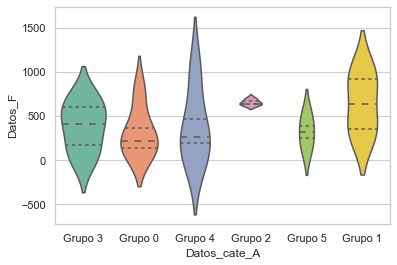

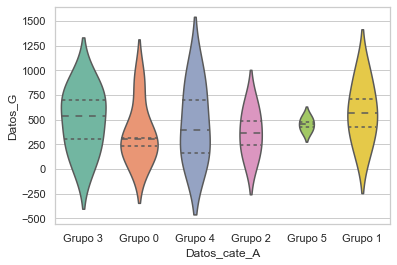

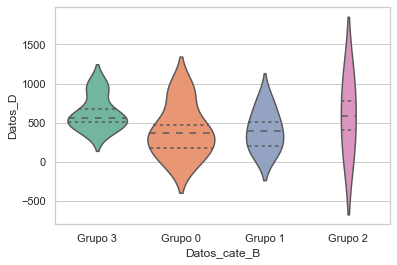

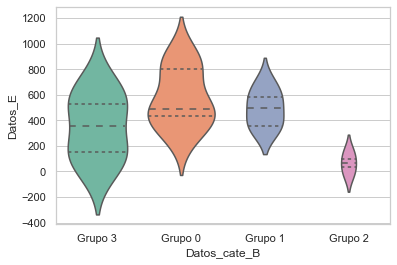

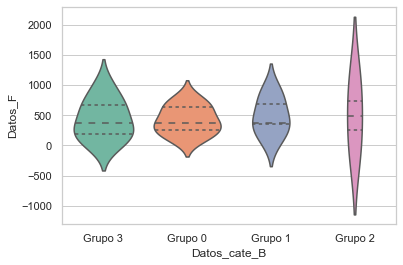

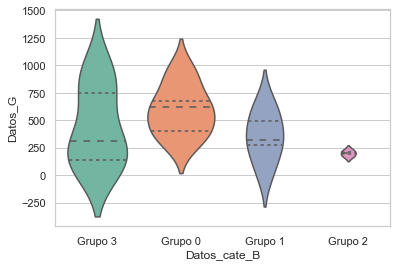

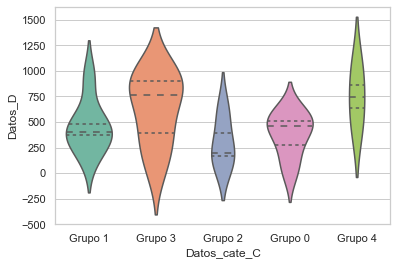

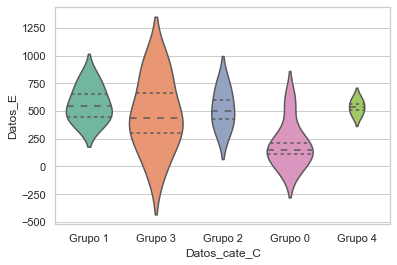

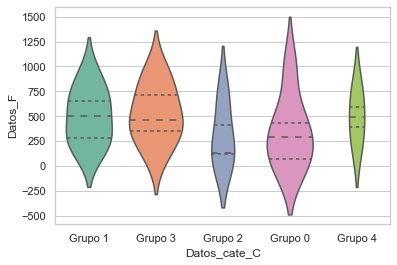

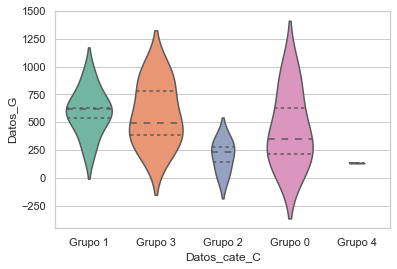


/////////-------------- GRAFICA DE VIONINES POR DICOTOMICAS -------------------/////////////



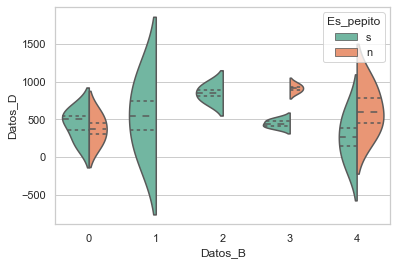

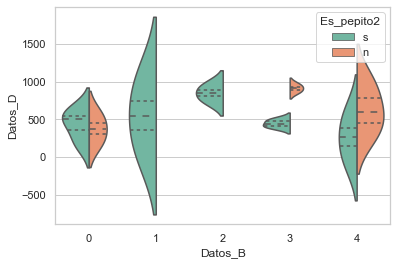

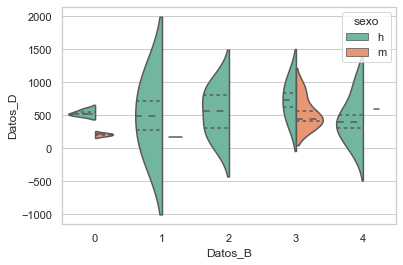

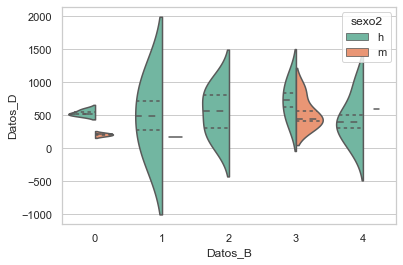

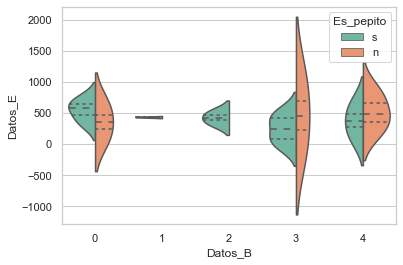

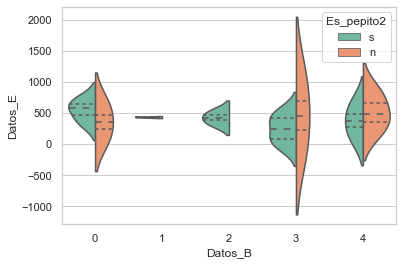

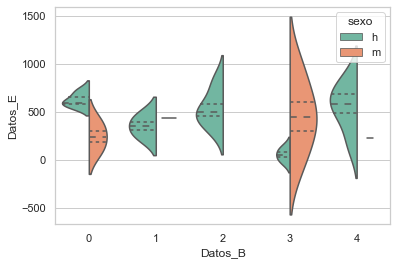

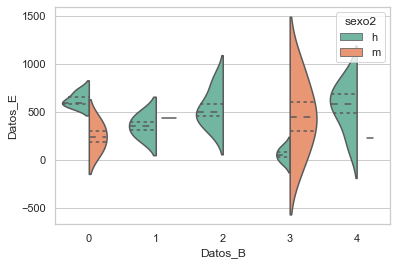

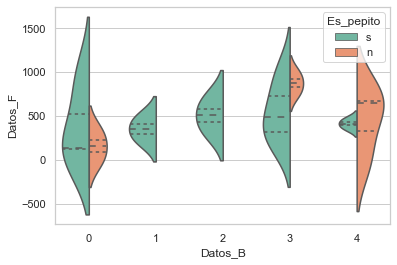

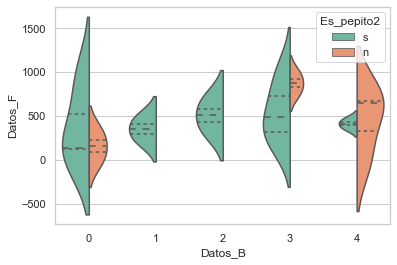

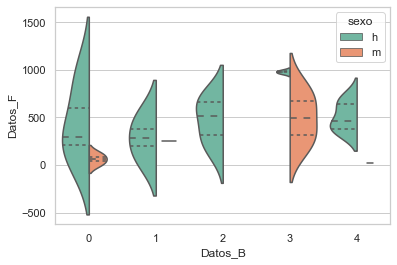

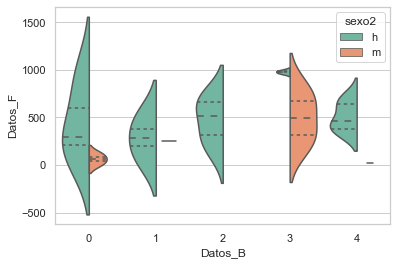

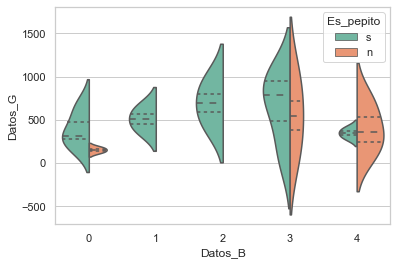

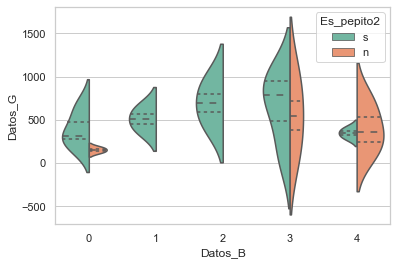

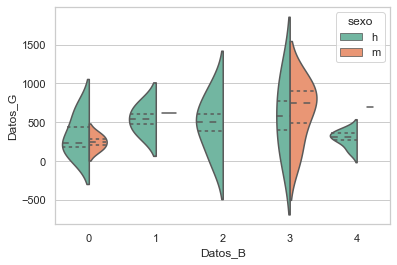

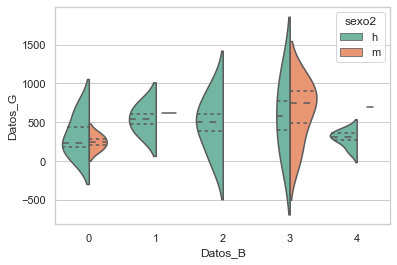

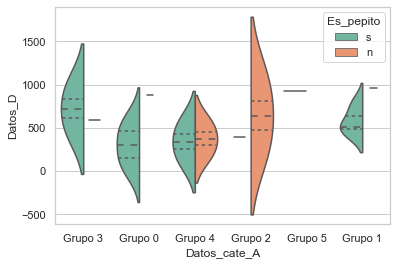

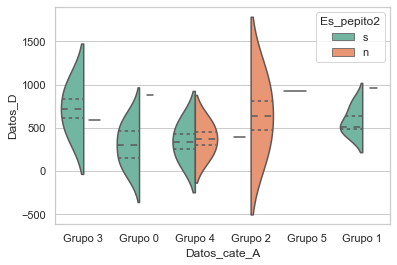

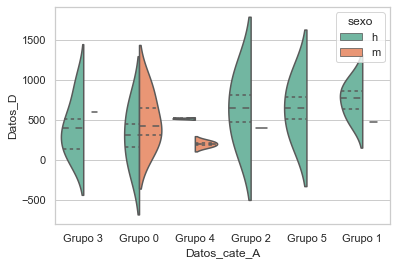

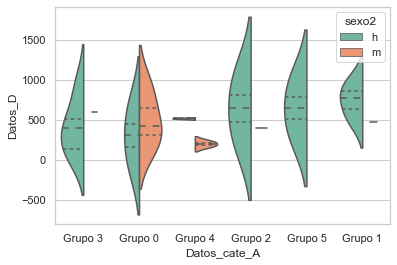

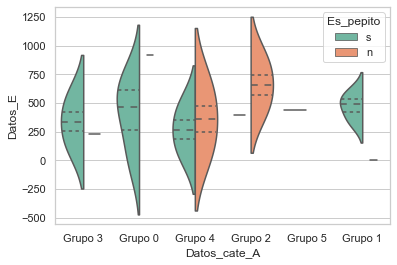

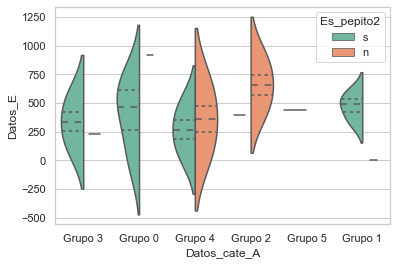

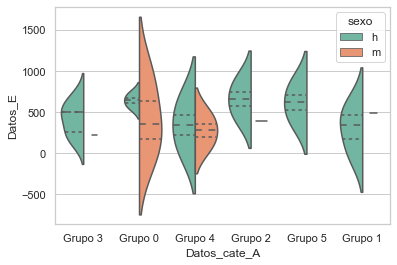

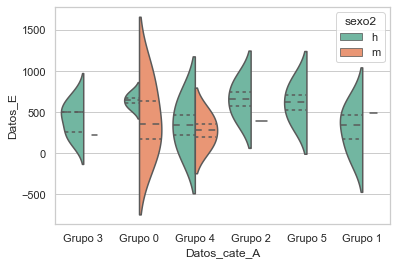

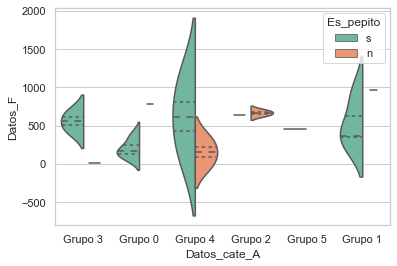

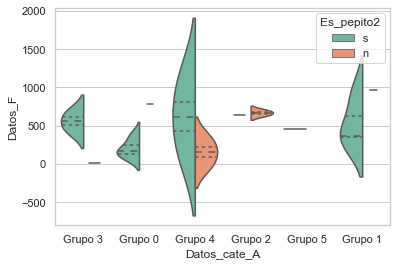

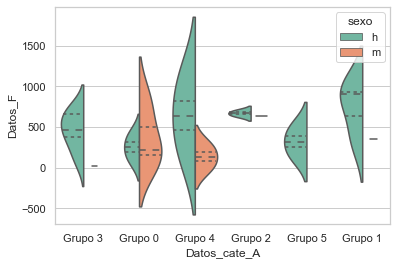

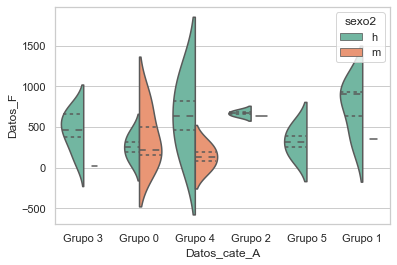

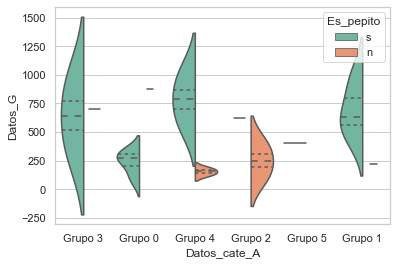

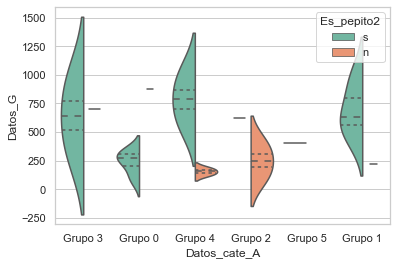

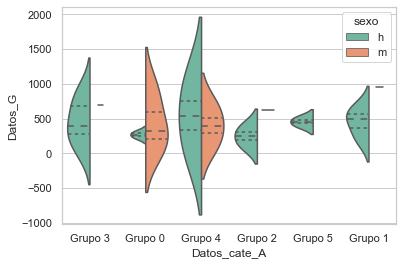

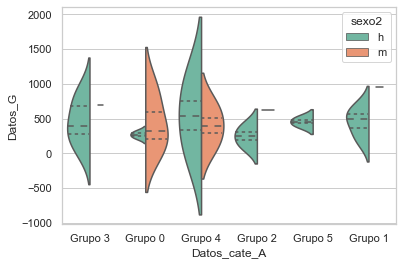

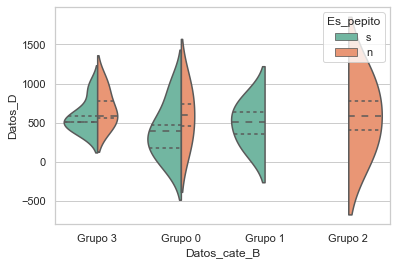

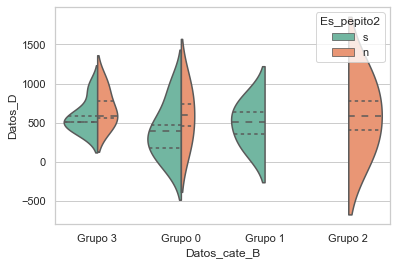

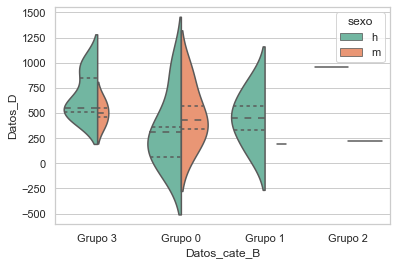

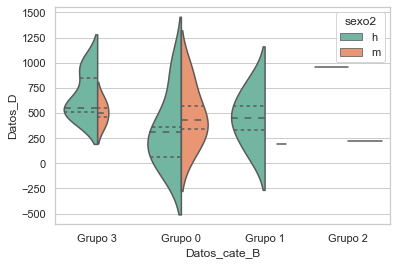

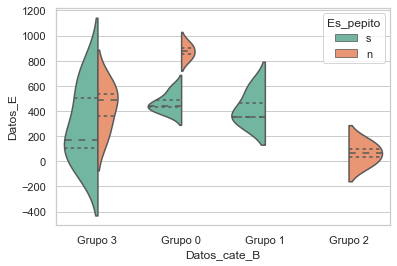

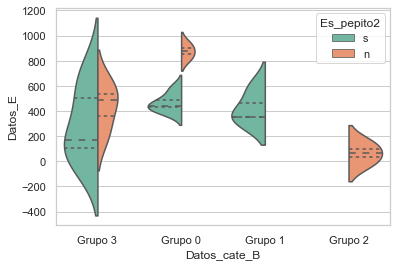

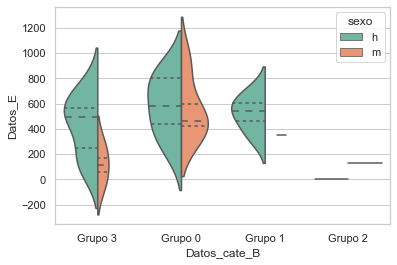

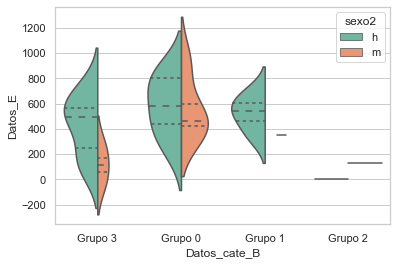

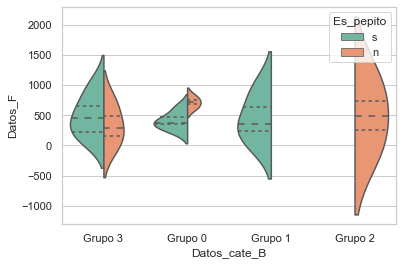

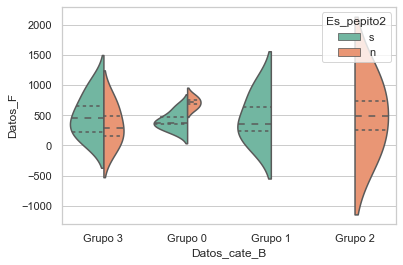

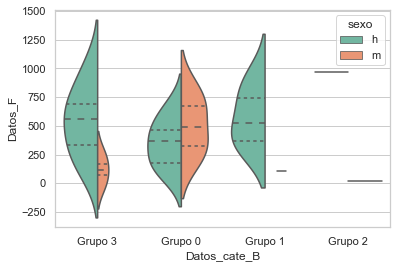

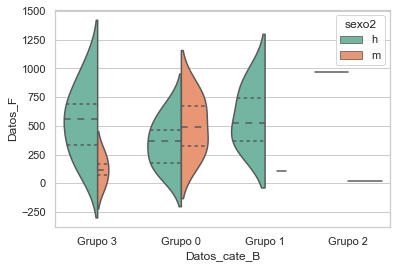

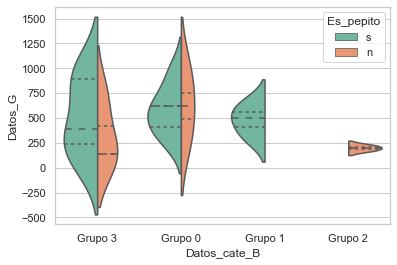

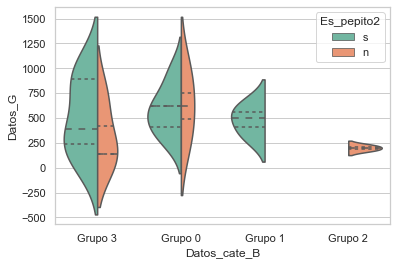

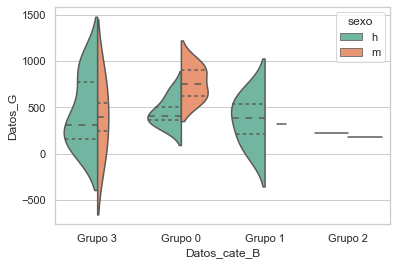

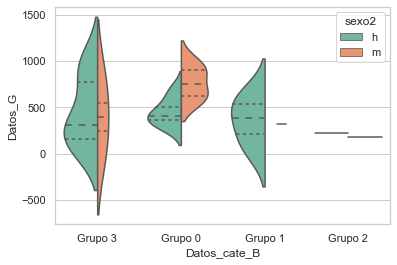

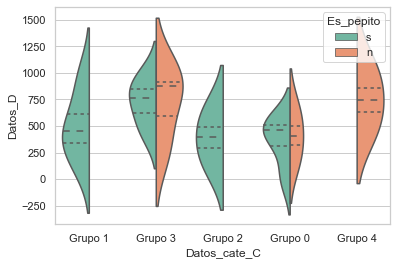

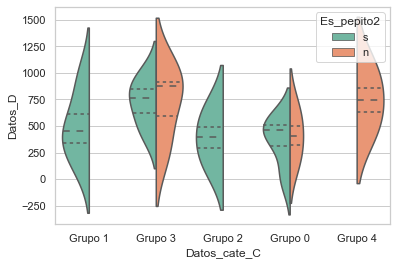

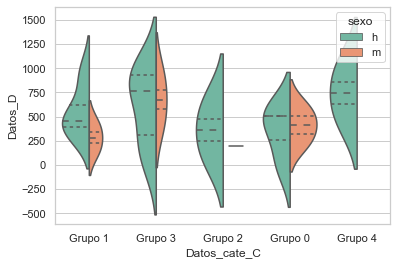

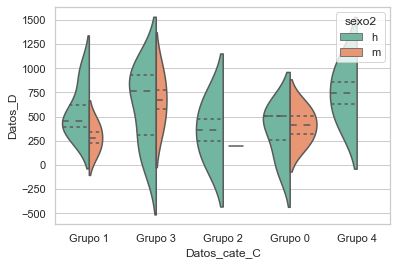

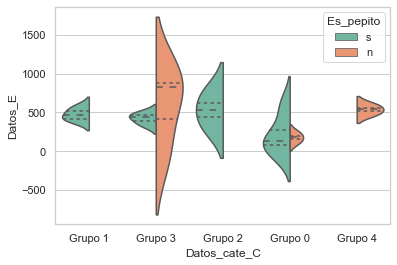

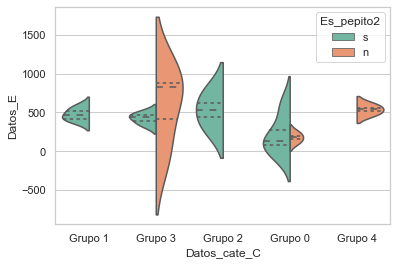

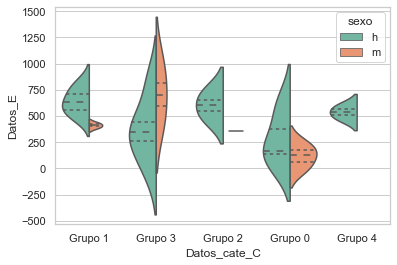

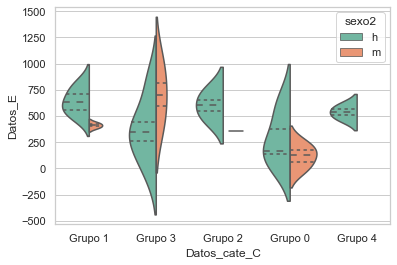

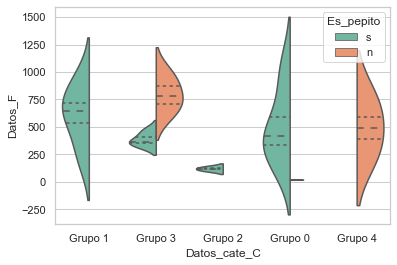

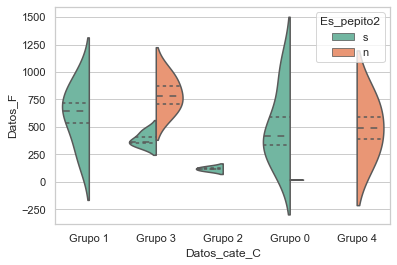

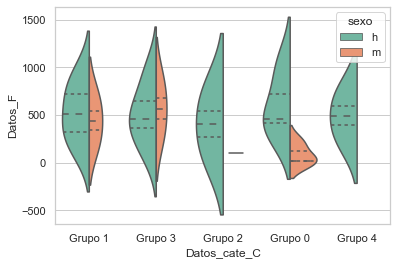

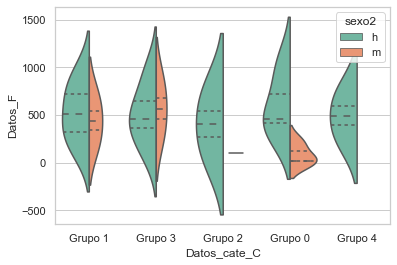

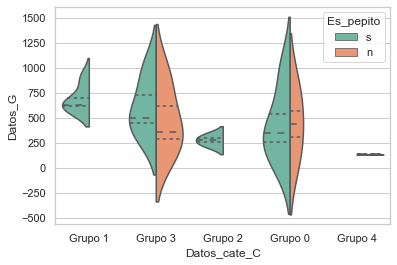

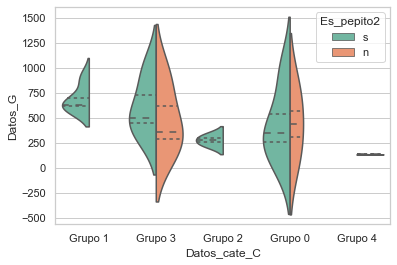

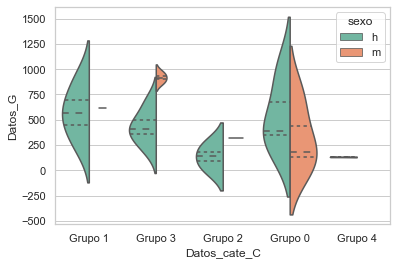

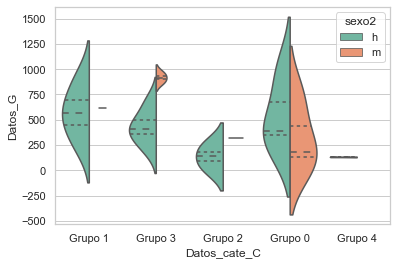

In [151]:
ejemplo.plots()

In [152]:
df_prueba.pivot(columns=['Datos_cate_C'],values='Datos_D')['Grupo 2']

0       NaN
1       NaN
2     133.0
3     590.0
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13    196.0
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
Name: Grupo 2, dtype: float64

In [153]:
ejemplo.anova()


----------- ANOVA Categoria Datos_B y variable continua Datos_D ----------

                sum_sq    df         F    PR(>F)
Datos_B   4.361724e+04   1.0  0.503347  0.485485
Residual  1.906399e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_E ----------

                sum_sq    df         F    PR(>F)
Datos_B   6.527800e+02   1.0  0.009718  0.922366
Residual  1.477839e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_F ----------

                sum_sq    df         F    PR(>F)
Datos_B   1.861760e+05   1.0  2.216159  0.150768
Residual  1.848185e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_B y variable continua Datos_G ----------

                sum_sq    df         F    PR(>F)
Datos_B   2.232076e+04   1.0  0.268664  0.609403
Residual  1.827771e+06  22.0       NaN       NaN

----------- ANOVA Categoria Datos_cate_A y variable continua Datos_D ----------

                    su

In [154]:
ejemplo.Chi()


-------------- Chi2 entre Es_pepito y Es_pepito2 ----------------
p: 7.744216431044088e-06 


-------------- Chi2 entre Es_pepito y sexo ----------------
p: 0.8482202494907526 

